# 워드 클라우드
단어의 등장 빈도를 시각화 한 형태
wordcloud 패키지 설치해얗ㅁ

### 실습용 파일 다운받아야함
## #01. 워드클라우드 기본 생성방법
### 패키지 참조


In [2]:
# 이미지 출력을 위한 jupyter 전용 기능
from IPython.display import Image, display

# 워드클라우드 클래스
from wordcloud import WordCloud

# 금지어 설정 모듈
from wordcloud import STOPWORDS

# 이미지 처리 모듈 (파이썬 기본 내장)
from PIL import Image as Img

import numpy as np

### 데이터 가져오기

In [3]:
with open("wordcloud/이상한나라의앨리스.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Alice's Adventures in Wonderland
       Illustrated by Arthur Rackham. With a Proem by Austin Dobson

Author: Lewis Carroll

Illustrator: Arthur Rackham

Release Date: May 19, 2009 [EBook #28885]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***




Produced by Jana Srna, Emmy and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images generously made available by the
University of Florida Digital Collections.)











ALICE'S ADVENTURES IN WONDERLAND

[Illustration: "Alice"]

[Illustration:

          ALICE'S·ADVENTURES
          IN·WONDERLAND
          BY·LEWIS·CAR

### 워드클라우드 객체 생성


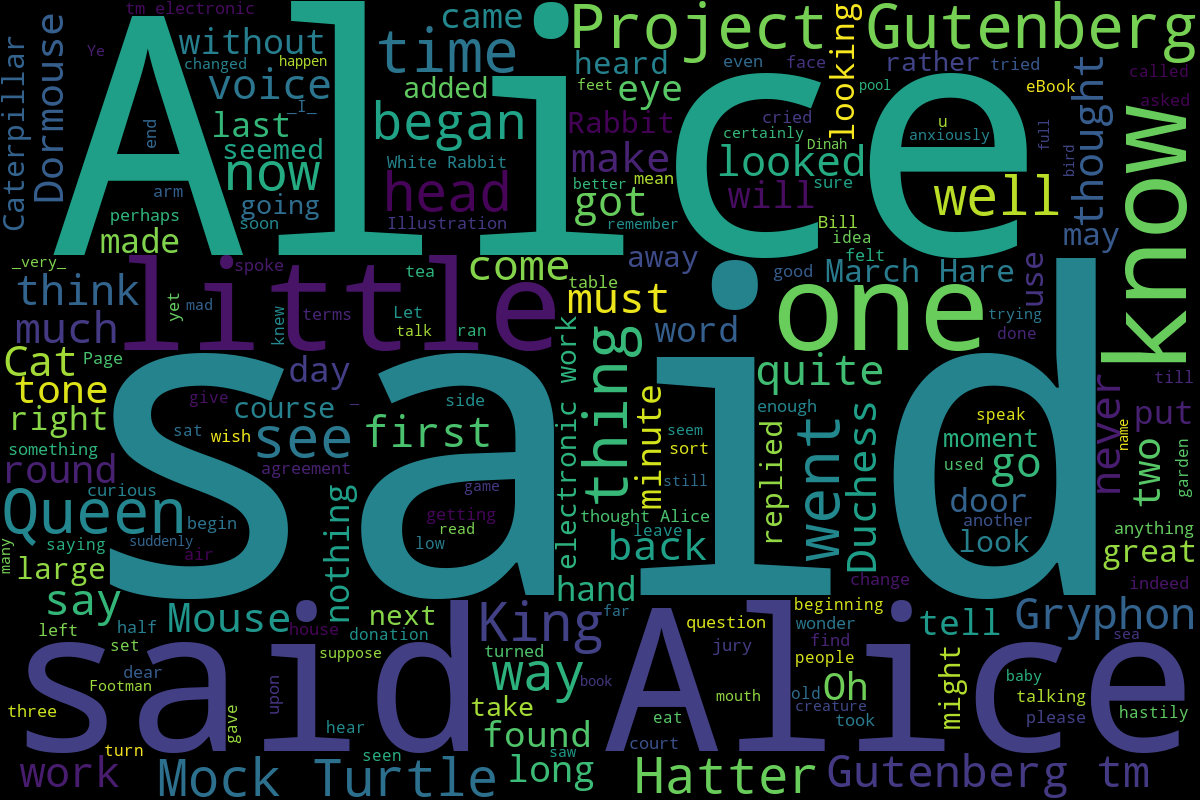

In [8]:
# 워드 클라우드 클래스의 객체 생성 -> 생성될 가로, 세로 크기 지정 (px단위)

wc = WordCloud(width=1200,height=800)
## 읽어드릴 텍스트 내용을  generate 매서드에 전달

wc.generate(text)

# wc.words_ 는 산정된 각 단어별 빈도수에 대한 딕셔너리이다.
# print(wc.words_)

# 그래픽 표시 데이터를 단어 빈도수에 대한 딕셔너리로 지정

wc.to_file("simple.png")

# 이미지를 출력하기 위한 jupyter 전용코드

display(Image(filename='simple.png'))

## 02. WordCloud 객체의 옵션

### 1. 금지어 설정

In [9]:
## 금지어 설졍 --> 피료한만큼 add()함수를 호출하여 추가

ignore = set(STOPWORDS)
ignore.add("said")
ignore.add("Alice")


### 2. 마스크 이미지 설정


In [10]:
img = Img.open("wordcloud/앨리스배경.png")
iarr = np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 워드 클라우드 확인

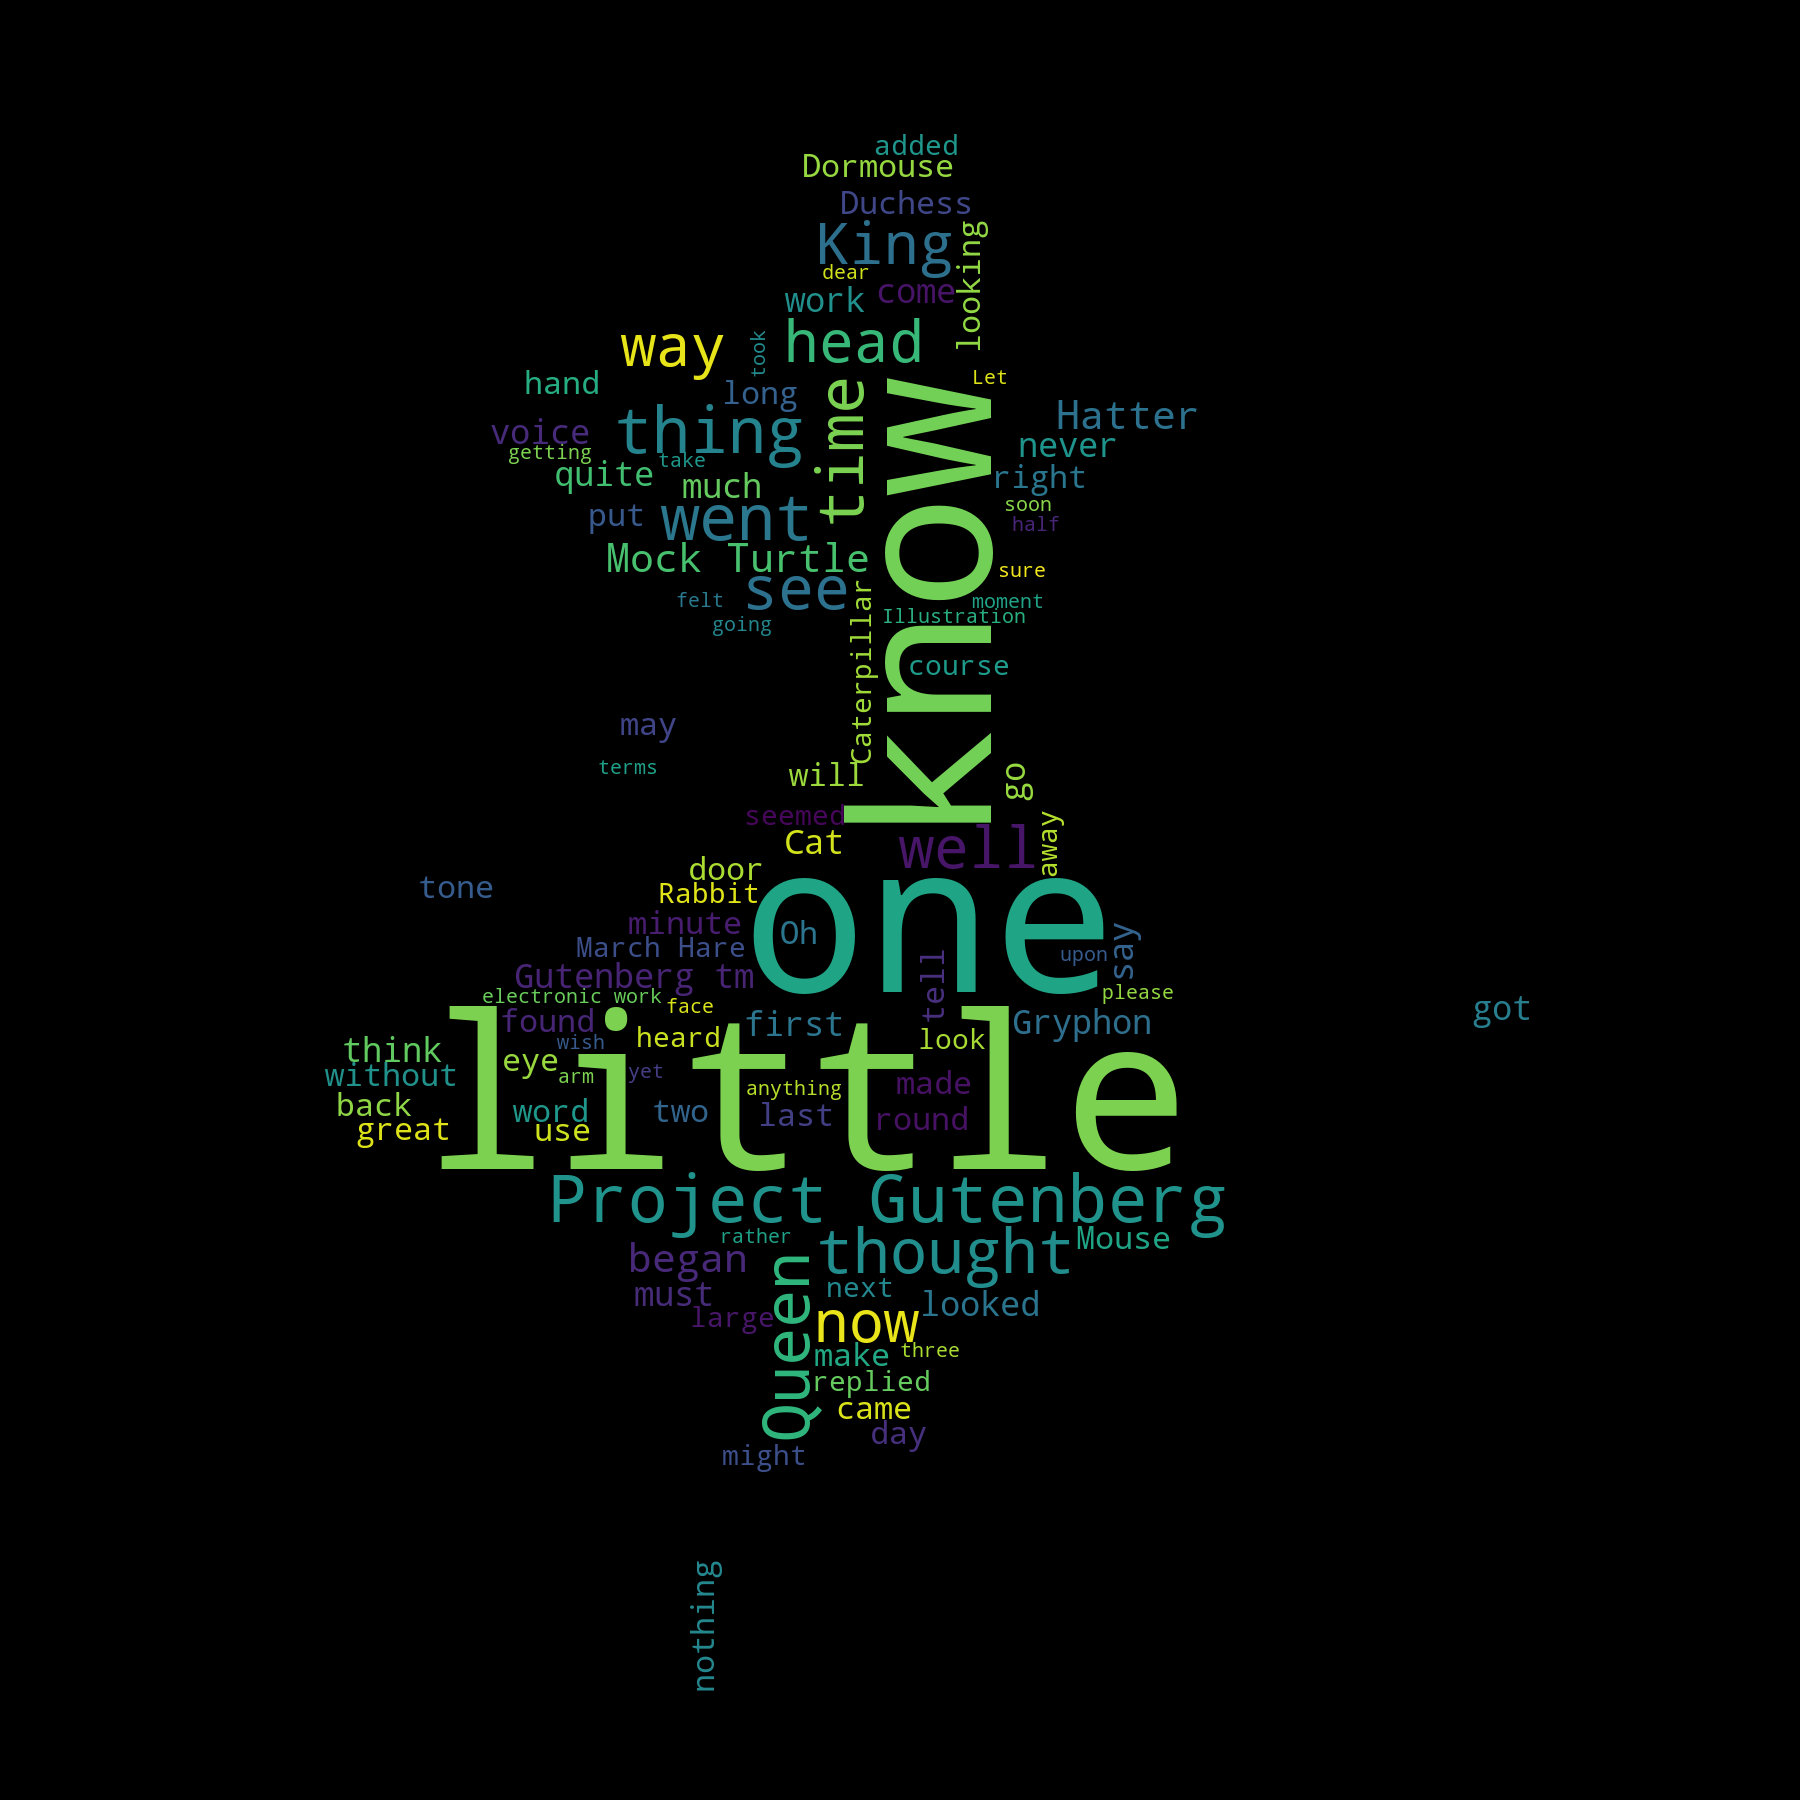

In [11]:
wc=WordCloud(width=600, height=1200, max_font_size=150,scale=2.0,
                max_words=100,stopwords=ignore,mask=iarr)

wc.generate(text)
wc.to_file("options.png")
display(Image(filename='options.png'))


## #03. 색상 설정
### 글자색상을 반환하는 함수
함수 이름은 상관 없지만 파라미터는 사전에 API가 정해놓은 규칙에 따라 정의해야 한다.

이 함수는 Wordcloud 객체에 의해서 단어수만큼 호출 당하는 함수

In [23]:

#,postion,orientaion
def get_color(word,font_size, random_state=None, **kwargs):
    # case 1) 단일 색상 지정
    # color = "#1550b0"
    # color = "rgb(21,80,176)"
    # color = "hsl(217, 30%, 87%)"
    # return color

    # case 2)
    # random_state.seed()                   # 랜덤숫자 카드를 섞는다.
    # r = random_state.randint(0, 255)      # red
    # g = random_state.randint(0, 255)      # green
    # b = random_state.randint(0, 255)      # blue
    # color = "rgb(%d, %d, %d)" % (r, g, b) # rgb(21, 80, 176) 형식으로 색상문자열 생성
    # return color 
    
    
    # case 3) hsl 형식 색상 지정
    # - 색상(H) : 0 ~ 360, 원형의 색상 띠 (`빨주노초파남보`는 대략 51˚씩 차이)
    # - 채도(S) : 0 ~ 100% , 색상의 순도 (빨갛다 ~ 새빨갛다 등)
    # - 명도(L) : 0(어둠,검게 보임) ~ 100(밝음,하얗게 보임)%, 색의 밝기
    random_state.seed()                     # 랜덤숫자 카드를 섞는다.
    a = random_state.randint(30, 90)        # 채도를 랜덤하게 설정
    b = random_state.randint(30, 90)        # 명도를 랜덤하게 설정
    color = "hsl(270, %d%%, %d%%)" % (a, b) # hsl(270, 54% 32%) 형식으로 문자열 생성
    return color

### 워드클라우드 생성 

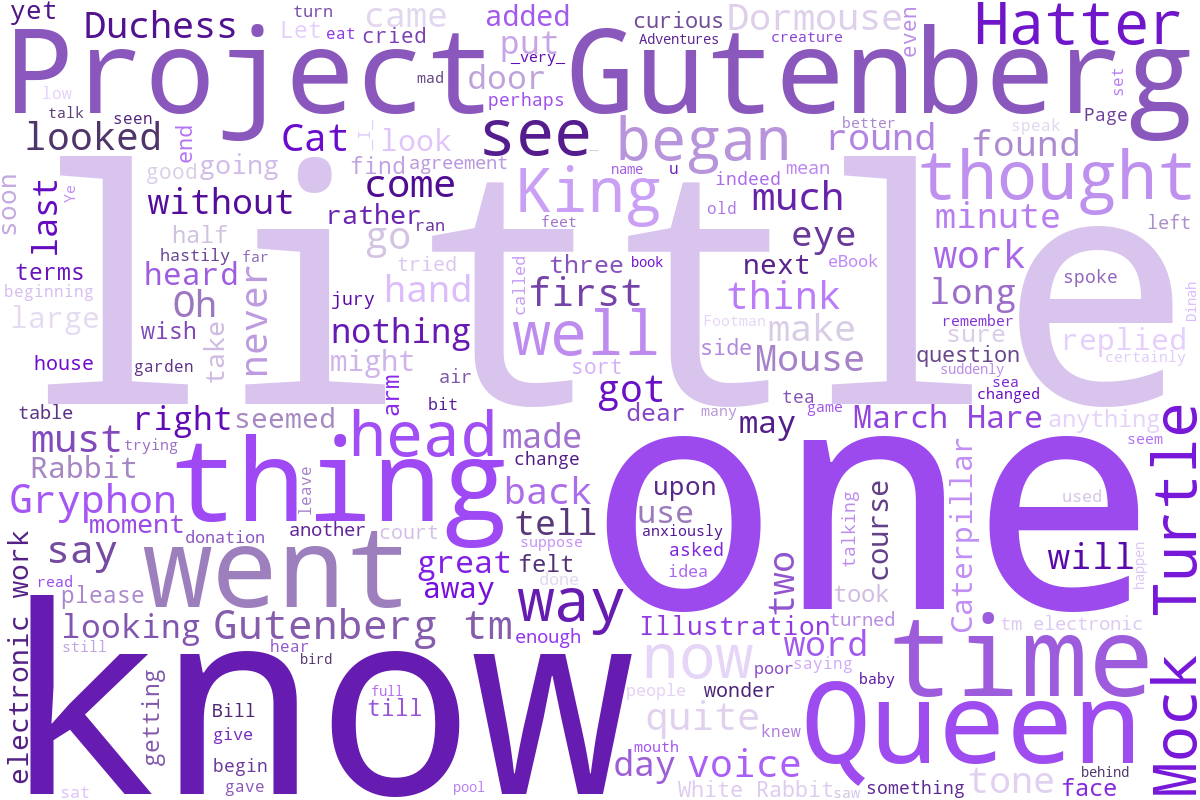

In [24]:
# background_color 파라미터를 통해 배경색상을 설정할 수 있다.

wc=WordCloud(width=1200,height=800,stopwords=ignore,background_color="#ffffff")
wc.generate(text)

## 단어의 색상을 반환할 함수를 연결
# -> 색상값을 리턴해 줄 함수의 이름과 random_state 기능 사용여부 설정
#   여기서 설정한 random_state 에 따라 make_coloors 함수 안에서 랜덤값을 
#   사용할 수 있을지가 결정된다.

wc.recolor(color_func=get_color, random_state=True)

wc.to_file("colors.png")
display(Image(filename="colors.png"))